<a href="https://colab.research.google.com/github/nwaeze77/Animal_Classification/blob/main/Animal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# Coonect to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define and split data into training and validation
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/animals')
ds_train = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/animals', validation_split=0.2, subset='training', seed=123, image_size=(256, 256), batch_size=32)
ds_valide = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/animals', validation_split=0.2, subset='validation', seed=123, image_size=(256, 256), batch_size=32)

Found 1504 files belonging to 4 classes.
Found 1504 files belonging to 4 classes.
Using 1204 files for training.
Found 1504 files belonging to 4 classes.
Using 300 files for validation.


In [ ]:
# Define the batch size and print image label
import tensorflow_datasets as tfds
batch_size = 32
class_names = dataset.class_names
print(class_names)

['buffalo', 'elephant', 'rhino', 'zebra']


In [ ]:
#Resize image and standardize data
size = (256, 256)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_valide = ds_valide.map(lambda image, label: (tf.image.resize(image, size), label))

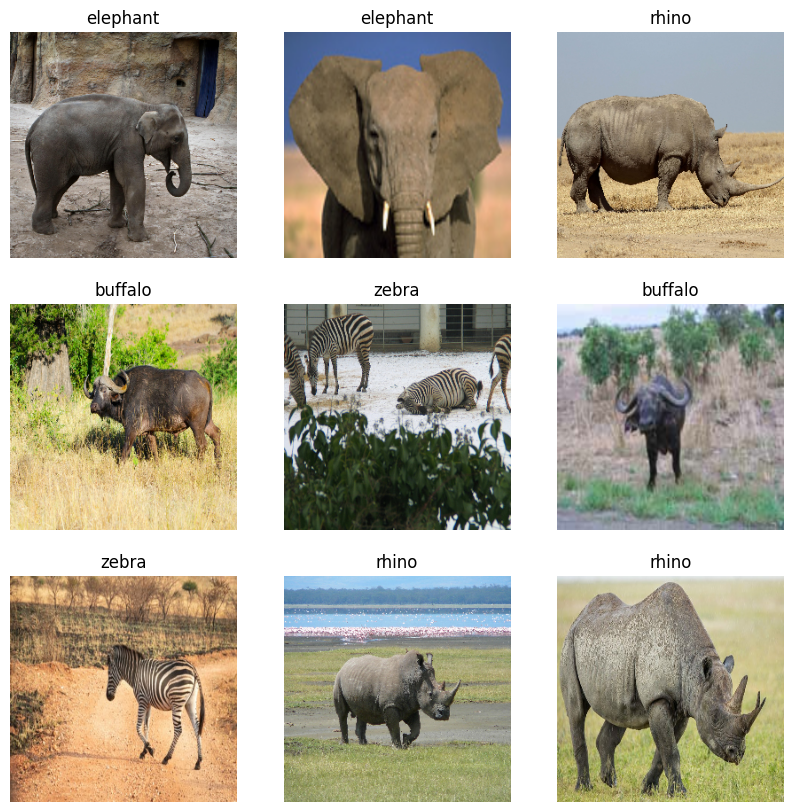

In [ ]:
# Display the first nine images
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Further processing to increase instance images
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

image = Sequential([layers.RandomFlip("horizontal"),
                    layers.RandomRotation(0.1),
                    layers.RandomZoom(height_factor  = (-0.2, -0.3), width_factor = (-0.2,-0.3), interpolation = 'nearest'),
                    layers.RandomContrast(factor = 0.1),
                    layers.RandomTranslation(height_factor = 0.1, width_factor = 0.1)],

                   name = 'image',
                   )

In [ ]:

import numpy as np

for images, labels in ds_train.take(1):
  plt.figure(figsize = (10,10))
  first_image = images[0]
  def f(x):
    return np.int(x)
    f2 = np.vectorize(f)

    for i in range(9):
      ax = plt.subplot(3,3,i +1)
      augmented_image = image( tf.expand_dims(first_image, 0), training = True)

      plt.imshow(augmented_image[0].numpy().astype('int32'))
      plt.title(f2(labels[0]))
      plt.axis('off')

<Figure size 1000x1000 with 0 Axes>